## Project Overview

This project analyzes the performance of an insurance agency using a **simulated dataset** designed to reflect real-world business behavior. The data includes information about agents, states, policy sales, premium revenue, marketing channels, acquisition costs, retention rates, and monthly activity.

The main objective of this analysis is to understand **sales performance**, **marketing efficiency**, and **customer retention**, and to demonstrate how data analysis can support better **business and strategic decisions**.

This project follows a typical data analyst workflow:

* Data generation and preparation using Python
* Feature engineering (ROI calculation)
* Exploratory data analysis (EDA)
* Business-oriented insights and conclusions

The final results are intended to be used by stakeholders such as **marketing teams**, **sales managers**, and **business analysts**.


## Load and Read Dataset

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("insurance_agency_performance.csv")

# Preview
df.head()

,Agent_ID,State,Policies_Sold,Premium_Amount,Marketing_Channel,Acquisition_Cost,Retention_Rate,Month
0,1,FL,21,19949.74,Social Media,236.69,0.82,2024-01
1,1,FL,23,31853.96,Referral,136.62,0.91,2024-02
2,1,FL,21,19142.16,TV,875.42,0.60,2024-03
3,1,FL,17,19176.59,Referral,111.19,0.86,2024-04
4,1,FL,19,23562.92,Referral,88.25,0.95,2024-05


---

## Data Cleaning & Feature Engineering

### Create ROI

In [12]:
df["ROI"] = (df["Premium_Amount"] - df["Acquisition_Cost"]) / df["Acquisition_Cost"]

### Convert Month to datetime

In [13]:
df["Month"] = pd.to_datetime(df["Month"])

---

## Exploratory Data Analysis

### Top-Performing Agents

In [14]:
top_agents = (
    df.groupby("Agent_ID", as_index=False)
      .agg(
          Total_Premium=("Premium_Amount", "sum"),
          Total_Policies=("Policies_Sold", "sum")
      )
      .sort_values("Total_Premium", ascending=False)
      .head(10)
)

top_agents

,Agent_ID,Total_Premium,Total_Policies
17,18,319513.70,269
37,38,318478.67,265
45,46,313043.57,262
24,25,312171.68,266
32,33,311882.31,261
46,47,304660.02,249
49,50,304454.63,259
38,39,303835.56,251
5,6,301857.03,245
31,32,299470.64,273


#### Plot: Top 10 Agents by Revenue

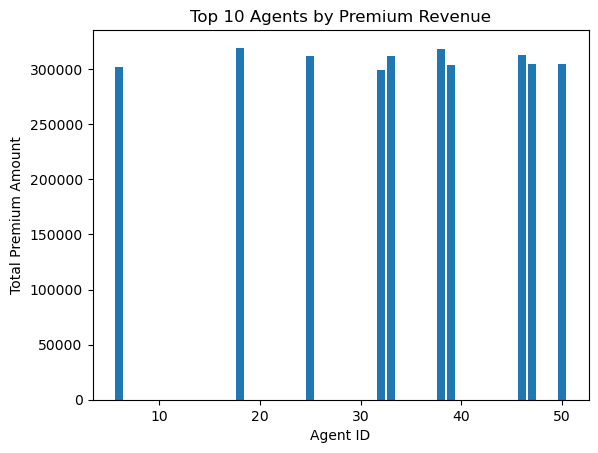

In [15]:
plt.figure()
plt.bar(top_agents["Agent_ID"], top_agents["Total_Premium"])
plt.xlabel("Agent ID")
plt.ylabel("Total Premium Amount")
plt.title("Top 10 Agents by Premium Revenue")
plt.show()


### ROI by Marketing Channel

In [16]:
roi_channel = (
    df.groupby("Marketing_Channel", as_index=False)
      .agg(
          Avg_ROI=("ROI", "mean"),
          Avg_Cost=("Acquisition_Cost", "mean")
      )
      .sort_values("Avg_ROI", ascending=False)
)

roi_channel

,Marketing_Channel,Avg_ROI,Avg_Cost
2,Referral,246.926317,104.274926
1,Email,106.956230,223.016549
3,Social Media,80.285245,299.818707
0,Digital Ads,52.483513,457.526080
4,TV,34.371325,710.705818


#### Plot: ROI per Channel

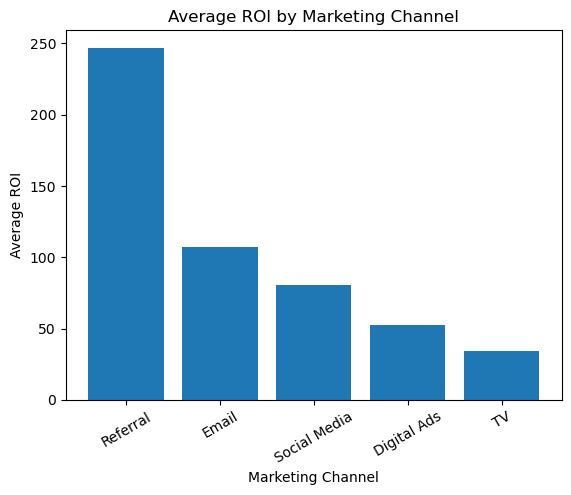

In [17]:
plt.figure()
plt.bar(roi_channel["Marketing_Channel"], roi_channel["Avg_ROI"])
plt.xlabel("Marketing Channel")
plt.ylabel("Average ROI")
plt.title("Average ROI by Marketing Channel")
plt.xticks(rotation=30)
plt.show()

### Trends in Policy Sales (Monthly)

In [18]:
monthly_trends = (
    df.groupby("Month", as_index=False)
      .agg(
          Policies_Sold=("Policies_Sold", "sum"),
          Premium_Amount=("Premium_Amount", "sum")
      )
)

monthly_trends


,Month,Policies_Sold,Premium_Amount
0,2024-01-01,1057,1206239.65
1,2024-02-01,1017,1224981.36
2,2024-03-01,1026,1170745.98
3,2024-04-01,974,1125937.83
4,2024-05-01,1031,1163558.93
5,2024-06-01,1058,1223825.76
6,2024-07-01,1003,1139227.30
7,2024-08-01,1047,1165104.75
8,2024-09-01,989,1181173.36
9,2024-10-01,1061,1217452.26


#### Plot: Policies Sold Over Time

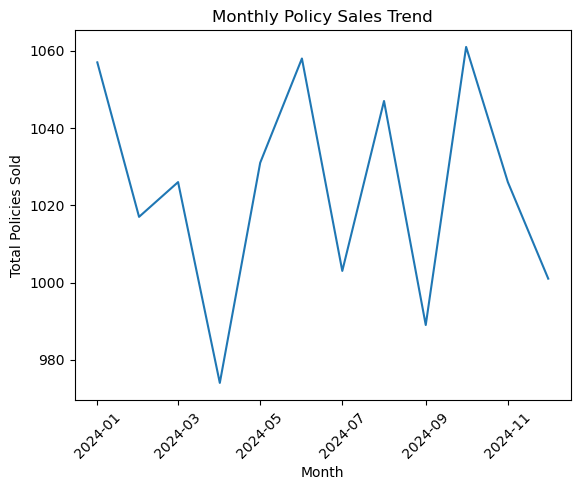

In [19]:
plt.figure()
plt.plot(monthly_trends["Month"], monthly_trends["Policies_Sold"])
plt.xlabel("Month")
plt.ylabel("Total Policies Sold")
plt.title("Monthly Policy Sales Trend")
plt.xticks(rotation=45)
plt.show()

### State-Level Performance

In [20]:
state_perf = (
    df.groupby("State", as_index=False)
      .agg(
          Total_Premium=("Premium_Amount", "sum"),
          Avg_ROI=("ROI", "mean")
      )
      .sort_values("Total_Premium", ascending=False)
)

state_perf

,State,Total_Premium,Avg_ROI
1,FL,4588242.66,113.733795
3,NY,3211905.99,99.332350
0,CA,2774052.45,118.418299
4,TX,2213635.20,112.974548
2,IL,1373432.45,88.631587


#### Plot: Revenue by State

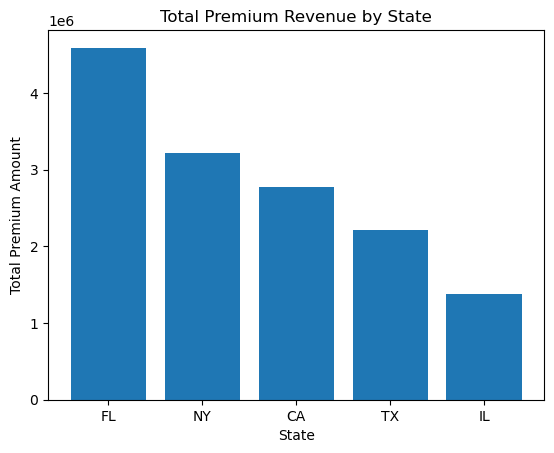

In [21]:
plt.figure()
plt.bar(state_perf["State"], state_perf["Total_Premium"])
plt.xlabel("State")
plt.ylabel("Total Premium Amount")
plt.title("Total Premium Revenue by State")
plt.show()

### Acquisition Cost vs Retention Rate

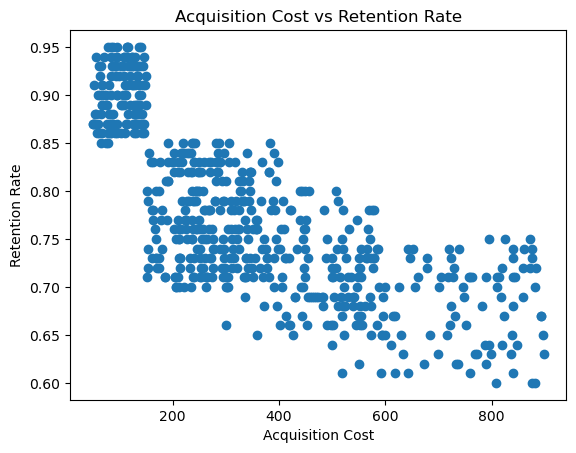

In [22]:
plt.figure()
plt.scatter(df["Acquisition_Cost"], df["Retention_Rate"])
plt.xlabel("Acquisition Cost")
plt.ylabel("Retention Rate")
plt.title("Acquisition Cost vs Retention Rate")
plt.show()

## 🎯 Key Findings

Based on the exploratory data analysis, the following insights were identified:

* **Referral marketing channels show the highest ROI** and the strongest customer retention rates, indicating they are the most cost-effective acquisition method.
* **TV advertising has the highest acquisition cost** and a comparatively lower ROI, suggesting a need for budget optimization or targeting improvements.
* **Digital Ads and Social Media channels** provide moderate ROI with scalable reach, making them useful for growth strategies.
* **Policy sales remain relatively stable throughout the year**, with slight monthly variations, indicating consistent demand.
* **Certain states (such as California and Texas)** generate higher total premium revenue, making them key markets for sales focus.
* Higher acquisition costs **do not necessarily result in higher retention**, highlighting the importance of channel efficiency over spending volume.

These insights can help guide **marketing budget allocation**, **agent performance evaluation**, and **state-level strategy planning**.

---

## 🚀 Next Steps

To further enhance this analysis and support decision-making, the following steps are recommended:

* Perform deeper analysis using **SQL** to replicate real production environments and validate results at scale.
* Develop an **interactive Power BI dashboard** to allow stakeholders to explore trends by state, channel, and time period.
* Incorporate additional metrics such as customer lifetime value (CLV) and churn rate for more advanced analysis.
* Introduce data quality challenges (missing values or outliers) to demonstrate data cleaning and validation techniques.
* Extend the dataset with multiple years of data to identify long-term trends and seasonality.

These next steps would make the analysis more robust and closer to a real-world insurance analytics use case.

### Export Cleaned Dataset

In [23]:
df.to_csv("insurance_agency_analysis_ready.csv", index=False)